# Исследование объявлений о продаже квартир

В вашем распоряжении данные, спаршенные данные объявлений о продаже квартир в Кабардино-Балкарской Республике и соседних населённых пунктах. Необходимо научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и выявления мошеннической деятельности.

По каждой квартире на продажу доступны следующие данные:
- **Название**
- **Цена**
- **Цена за м²**
- **Город**
- **Этаж**
- **Всего этажей**
- **Количество комнат**
- **Метраж**
- **Просмотры**
- **Владелец**

Данные, которые считаются некорректными:
- **Ссылка**

## План исследования

1. **Ознакомление с данными**
2. **Предобработка данных**
3. **Работа с пропусками**
4. **Работа с типами данных**
5. **Обработка неявных дубликатов**
6. **Поиск и работа с аномалиями**
7. **Добавление новых столбцов:**
8. **Месяц публикации объявления**
9. **Год публикации объявления**
10. **Исследовательский анализ, изучение параметров:**
   - Общая площадь
   - Цена объекта
   - Количество комнат
   - Этаж квартиры
   - Общее количество этажей в доме
   - День и месяц публикации объявления

## ПРОВЕСТИ: Исследовательский анализ
## СДЕЛАТЬ: Общий вывод

In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import re
import matplotlib.ticker as ticker


df = pd.read_csv('all.csv',sep=';')  # загрузим наши данные


In [514]:
df.head(5) # посмотрим на нашу таблицу

,НОМЕР,Название,Цена,ЦЕНА за м²,Город,Этаж,Всего этажей,Комнат,Метраж,Владелец,Время,Просмотры,Ссылка
0,1,"Продаем 1-комнатную квартиру, 38 м², Нальчик",1 440 000 ₽,37894.74,г. Нальчик,2.0,4.0,1,38,Собственник,2024-07-20 03:04:54,19,https://kbr.move.ru/objects/prodaetsya_1-komna...
1,2,"Продам 1-комнатную квартиру, 46 м², Нальчик",2 024 000 ₽,44000.00,г. Нальчик,3.0,9.0,1,46,Застройщик,2024-07-20 03:04:52,15,https://kbr.move.ru/objects/prodaetsya_1-komna...
2,3,"Продажа 1-комнатной квартиры, 42.5 м², Нальчик...",4 500 000 ₽,107142.86,г. Нальчик,3.0,5.0,1,42,Собственник,2024-07-20 03:04:41,30,https://kbr.move.ru/objects/prodaetsya_1-komna...
3,4,"Продажа 1-комнатной квартиры, 33 м², Нальчик",3 350 000 ₽,101515.15,г. Нальчик,2.0,4.0,1,33,Собственник,2024-07-20 03:04:36,13,https://kbr.move.ru/objects/prodaetsya_1-komna...
4,5,"Продаем 1-комнатную квартиру, 39 м², Нальчик",1 755 000 ₽,45000.00,г. Нальчик,5.0,9.0,1,39,Застройщик,2024-07-20 03:04:34,13,https://kbr.move.ru/objects/prodaetsya_1-komna...


In [515]:
df.info() #посмотрим информацию о типах данных и их количестве

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   НОМЕР         862 non-null    int64  
 1   Название      862 non-null    object 
 2   Цена          862 non-null    object 
 3   ЦЕНА за м²    862 non-null    float64
 4   Город         862 non-null    object 
 5   Этаж          861 non-null    float64
 6   Всего этажей  861 non-null    float64
 7   Комнат        862 non-null    int64  
 8   Метраж        862 non-null    int64  
 9   Владелец      862 non-null    object 
 10  Время         862 non-null    object 
 11  Просмотры     862 non-null    int64  
 12  Ссылка        862 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 87.7+ KB


In [516]:
# 1. Удаление столбца "Ссылка"
df = df.drop(columns=['Ссылка'])

In [517]:
# 2. Преобразование столбца "Время" в формат времени
df['Время'] = pd.to_datetime(df['Время'])

In [518]:
# 3. Преобразование столбцов "Всего этажей" и "Этаж" в формат int
df['Всего этажей'] = df['Всего этажей'].astype('Int64')  # Используем 'Int64', чтобы поддерживать NaN
df['Этаж'] = df['Этаж'].astype('Int64')  # Используем 'Int64', чтобы поддерживать NaN

In [519]:
# 4. Преобразование столбца "Цена" в формат int после удаления символов рубля и пробелов
df['Цена'] = df['Цена'].replace({'₽': '', ' ': ''}, regex=True).astype(int)

In [520]:
df.info() #еще раз посмотрим информацию о типах данных и их количестве

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   НОМЕР         862 non-null    int64         
 1   Название      862 non-null    object        
 2   Цена          862 non-null    int64         
 3   ЦЕНА за м²    862 non-null    float64       
 4   Город         862 non-null    object        
 5   Этаж          861 non-null    Int64         
 6   Всего этажей  861 non-null    Int64         
 7   Комнат        862 non-null    int64         
 8   Метраж        862 non-null    int64         
 9   Владелец      862 non-null    object        
 10  Время         862 non-null    datetime64[ns]
 11  Просмотры     862 non-null    int64         
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 82.6+ KB


In [521]:
df.describe() #Посмотрим характеристики, дающие представление о выборке

,НОМЕР,Цена,ЦЕНА за м²,Этаж,Всего этажей,Комнат,Метраж,Время,Просмотры
count,862.000000,8.620000e+02,8.620000e+02,861.0,861.0,862.0,862.000000,862,862.000000
mean,431.500000,7.116427e+06,1.699431e+05,5.747967,9.740999,1.0,45.298144,2024-07-14 15:20:46.577726208,17.450116
min,1.000000,9.200000e+05,2.857143e+04,1.0,3.0,1.0,28.000000,2023-12-18 10:25:19,0.000000
25%,216.250000,1.927000e+06,4.362983e+04,3.0,6.0,1.0,41.000000,2024-07-18 10:33:15.249999872,3.000000
50%,431.500000,3.100002e+06,6.732733e+04,5.0,11.0,1.0,45.000000,2024-07-18 17:58:42,7.000000
75%,646.750000,4.023026e+06,8.808811e+04,8.0,12.0,1.0,49.000000,2024-07-20 03:00:00,19.000000
max,862.000000,3.340000e+09,8.564103e+07,18.0,42.0,1.0,108.000000,2024-07-20 03:04:54,144.000000
std,248.982262,1.136601e+08,2.914676e+06,3.179204,3.637537,0.0,6.954838,NaN,24.351743


<Figure size 1500x1000 with 0 Axes>

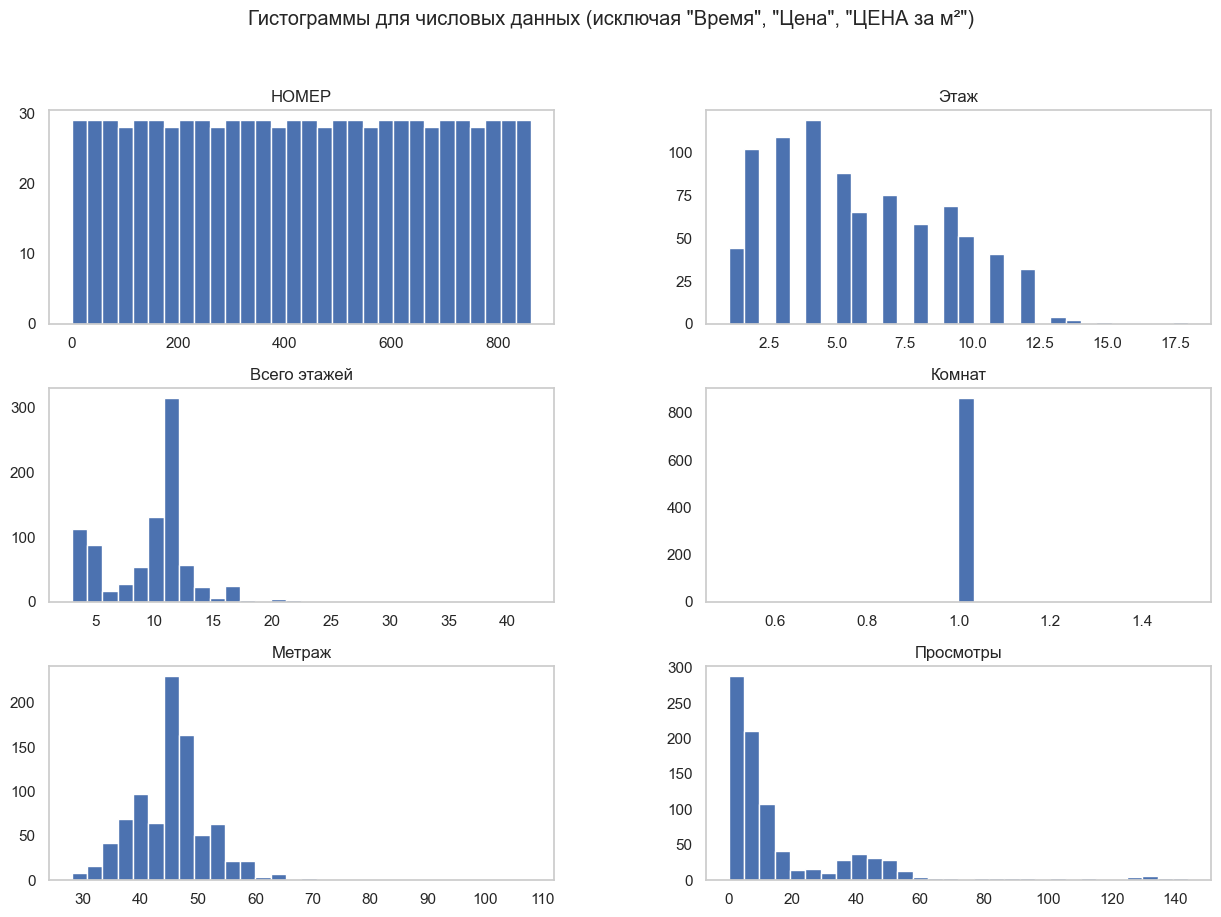

In [522]:
columns_for_hist = [col for col in df.columns if col not in ['Время', 'Цена', 'ЦЕНА за м²']]
plt.figure(figsize=(15, 10))
df[columns_for_hist].hist(bins=30, grid=False, figsize=(15, 10))
plt.suptitle('Гистограммы для числовых данных (исключая "Время", "Цена", "ЦЕНА за м²")')
plt.show()


Предобработка данных
Перед началом предобработки зафиксируем форму нашего датафрейма, чтобы после сравнить.

In [523]:
shape = df.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

DataFrame Shape : (862, 12)
Number of rows : 862
Number of columns : 12


Приведем название столбца 'ЦЕНА за м²' к змеиному регистру.

In [524]:
df.columns = [col.lower().replace(' ', '_').replace('²', '_sq_m') for col in df.columns]

Поработаем с пропусками

In [525]:
df.isna().sum()

номер             0
название          0
цена              0
цена_за_м_sq_m    0
город             0
этаж              1
всего_этажей      1
комнат            0
метраж            0
владелец          0
время             0
просмотры         0
dtype: int64

Пропущенные значения заполним медианой

In [526]:
median_floor = df['этаж'].median()
median_total_floors = df['всего_этажей'].median()

df['этаж'].fillna(median_floor, inplace=True)
df['всего_этажей'].fillna(median_total_floors, inplace=True)



In [527]:
df.isna().sum()

номер             0
название          0
цена              0
цена_за_м_sq_m    0
город             0
этаж              0
всего_этажей      0
комнат            0
метраж            0
владелец          0
время             0
просмотры         0
dtype: int64

Поработаем над поиском неявных дубликатов

In [528]:
df.название.unique() #посмотрим какие уникальные значения улиц в наших данных

array(['Продаем 1-комнатную квартиру, 38 м², Нальчик',
       'Продам 1-комнатную квартиру, 46 м², Нальчик',
       'Продажа 1-комнатной квартиры, 42.5 м², Нальчик, ул. мовсисяна, 9',
       'Продажа 1-комнатной квартиры, 33 м², Нальчик',
       'Продаем 1-комнатную квартиру, 39 м², Нальчик',
       'Продаем 1-комнатную квартиру, 46 м², Нальчик',
       'Продам 1-комнатную квартиру, 45.3 м², Нальчик',
       'Продам 1-комнатную квартиру, 48.9 м², Нальчик',
       'Продается 1-комнатная квартира, 50 м², Нальчик',
       'Продается 1-комнатная квартира, 49.7 м², Нальчик',
       'Продаем 1-комнатную квартиру, 45 м², Нальчик',
       'Продаю 1-комнатную квартиру, 43 м², Нальчик',
       'Продаю 1-комнатную квартиру, 47.3 м², Нальчик',
       'Продаем 1-комнатную квартиру, 49 м², Нальчик',
       'Продам 1-комнатную квартиру, 49.1 м², Нальчик',
       'Продам 1-комнатную квартиру, 50.3 м², Нальчик',
       'Продажа 1-комнатной квартиры, 49.7 м², Нальчик',
       'Продам 1-комнатную квартир

Давате создадим еще две колонке с названим улицы и номером_улицы

In [529]:
# Функция для извлечения улицы и номера
def extract_street_and_number(address):
    # Регулярное выражение для поиска улицы и номера
    match = re.search(r'(?:ул\.|улица\s)([\w\s]+),?\s*(\d+)', address)
    if match:
        street = match.group(1).strip()
        number = match.group(2).strip()
        return street, number
    return None, None

# Применение функции к колонке 'Название'
df[['улица', 'номер_улицы']] = df['название'].apply(lambda x: pd.Series(extract_street_and_number(x)))

In [530]:
df.head()

,номер,название,цена,цена_за_м_sq_m,город,этаж,всего_этажей,комнат,метраж,владелец,время,просмотры,улица,номер_улицы
0,1,"Продаем 1-комнатную квартиру, 38 м², Нальчик",1440000,37894.74,г. Нальчик,2,4,1,38,Собственник,2024-07-20 03:04:54,19,None,None
1,2,"Продам 1-комнатную квартиру, 46 м², Нальчик",2024000,44000.00,г. Нальчик,3,9,1,46,Застройщик,2024-07-20 03:04:52,15,None,None
2,3,"Продажа 1-комнатной квартиры, 42.5 м², Нальчик...",4500000,107142.86,г. Нальчик,3,5,1,42,Собственник,2024-07-20 03:04:41,30,мовсисяна,9
3,4,"Продажа 1-комнатной квартиры, 33 м², Нальчик",3350000,101515.15,г. Нальчик,2,4,1,33,Собственник,2024-07-20 03:04:36,13,None,None
4,5,"Продаем 1-комнатную квартиру, 39 м², Нальчик",1755000,45000.00,г. Нальчик,5,9,1,39,Застройщик,2024-07-20 03:04:34,13,None,None


In [531]:
df[['улица', 'номер_улицы']].isna().value_counts() #считаем пропуски 

улица  номер_улицы
True   True           464
False  False          398
Name: count, dtype: int64

In [532]:
# Замена пропусков на "Не указано" в столбце 'улица' и '0' в столбце 'номер'
df['улица'].fillna('Не указано', inplace=True)
df['номер_улицы'].fillna('0', inplace=True)

In [533]:
set(df.улица.unique())  # для наглядности поиска неявных дубликатов список уникальных значений можно отсортировать в алфавитном порядке

{'Атажукина',
 'Ахохова',
 'Байсултанова',
 'Балкарова',
 'Братьев Пшегусовых',
 'Ватутина',
 'Затишье',
 'Идарова',
 'Кешокова',
 'Маяковского',
 'Налоева',
 'Не указано',
 'Пушкина',
 'Солнечная',
 'Тарчокова',
 'Тлостанова',
 'Хужокова',
 'Циолковского',
 'Чернышевского',
 'Шарданова',
 'Шогенова',
 'атажукина',
 'ашурова',
 'байсултанова',
 'головко',
 'идарова',
 'мовсисяна',
 'ногмова',
 'тарчокова',
 'тлостанова',
 'хужокова',
 'циолковского',
 'шогенова'}

Поработаем над редкими и выбивающимися значениями (аномалиями).

In [534]:
df.цена.sort_values(ascending=False).head(30) # отсортируем данные по столбцу цена в порядке убывания

376    3340000000
541       9100001
700       9000000
85        8150000
807       7950000
590       7750003
32        7720700
25        7720700
37        7720700
27        7670000
38        7670000
30        7670000
506       7559201
656       7500003
453       7300000
553       7150004
34        7126800
41        7126800
35        7126800
39        7126800
26        7126800
42        7080000
29        7080000
28        7080000
512       7000001
542       6700004
456       6600000
669       6561101
805       6561101
40        6561100
Name: цена, dtype: int64

Мы видим что у объявления 376 есть аномальная цена (3340000000) - давайте её удалим

In [535]:
# Удаление строки по индексу
df = df.drop(index=376)


In [536]:
df.head()

,номер,название,цена,цена_за_м_sq_m,город,этаж,всего_этажей,комнат,метраж,владелец,время,просмотры,улица,номер_улицы
0,1,"Продаем 1-комнатную квартиру, 38 м², Нальчик",1440000,37894.74,г. Нальчик,2,4,1,38,Собственник,2024-07-20 03:04:54,19,Не указано,0
1,2,"Продам 1-комнатную квартиру, 46 м², Нальчик",2024000,44000.00,г. Нальчик,3,9,1,46,Застройщик,2024-07-20 03:04:52,15,Не указано,0
2,3,"Продажа 1-комнатной квартиры, 42.5 м², Нальчик...",4500000,107142.86,г. Нальчик,3,5,1,42,Собственник,2024-07-20 03:04:41,30,мовсисяна,9
3,4,"Продажа 1-комнатной квартиры, 33 м², Нальчик",3350000,101515.15,г. Нальчик,2,4,1,33,Собственник,2024-07-20 03:04:36,13,Не указано,0
4,5,"Продаем 1-комнатную квартиру, 39 м², Нальчик",1755000,45000.00,г. Нальчик,5,9,1,39,Застройщик,2024-07-20 03:04:34,13,Не указано,0


Давайте поработаем с датами

In [537]:
df.время.sort_values(ascending=True).head(30)

861   2023-12-18 10:25:19
860   2023-12-18 10:36:57
859   2023-12-18 11:15:37
858   2024-02-08 13:50:51
857   2024-02-08 13:55:24
856   2024-02-08 14:04:29
855   2024-02-08 14:09:55
854   2024-02-08 14:34:30
853   2024-02-28 17:13:34
852   2024-03-05 10:28:36
851   2024-03-05 11:14:46
850   2024-03-05 11:52:54
849   2024-03-09 16:00:53
848   2024-03-11 18:23:55
847   2024-04-02 09:56:45
846   2024-04-08 13:23:09
845   2024-04-14 11:56:35
844   2024-04-20 15:50:46
843   2024-05-02 00:09:41
842   2024-05-03 22:09:00
841   2024-05-04 13:49:07
840   2024-05-12 09:12:03
839   2024-05-19 15:37:14
838   2024-05-23 07:46:32
837   2024-05-23 08:16:44
836   2024-05-27 11:20:40
835   2024-06-14 22:55:49
834   2024-06-16 19:44:45
833   2024-06-16 19:52:57
832   2024-06-20 08:29:27
Name: время, dtype: datetime64[ns]

Создадим еще два столбца год и месяц

In [538]:
# Создание столбца 'Год' (год в формате int)
df['год'] = df['время'].dt.year

# Создание столбца 'Месяц' (месяц в формате строк)
df['месяц'] = df['время'].dt.strftime('%B')  # Полное название месяца

In [539]:
df.год.value_counts() #считаем значения

год
2024    858
2023      3
Name: count, dtype: int64

Давайте удалим прошлогодние объявления 

In [540]:
# Удаление строк с индексами 859, 860, 861
indexes_to_drop = [859, 860, 861]
df = df.drop(index=indexes_to_drop)

Предлагаю удалить анамальные значения по метражу 1 комнатной квартиры

In [541]:
df.метраж.sort_values(ascending = False)

190    108
49      82
656     77
724     74
92      71
      ... 
493     30
351     30
649     30
438     28
757     28
Name: метраж, Length: 858, dtype: int64

In [542]:
df = df.drop(index=190) #удаляем

Работаем с количесвом этажей в Доме

In [543]:
df.всего_этажей.sort_values(ascending = False) #отсортируем

93     42
553    22
656    22
267    20
512    20
       ..
0       4
812     3
404     3
398     3
649     3
Name: всего_этажей, Length: 857, dtype: Int64

In [544]:
df.всего_этажей.value_counts() #группировка и подсет

всего_этажей
12    210
10    131
4     107
11    101
5      88
13     56
9      54
14     23
8      23
16     22
6      17
15      6
20      4
3       4
7       4
18      2
17      2
22      2
42      1
Name: count, dtype: Int64

Предлагаю удалить этаж 42 - это анамольное значение, в городе таких новостроек нет

In [545]:
df = df.drop(index=93) #удаляем

По завершении предобработки данных, посмотрим снова на размер нашего датафрейма, сравнив с исходным, вычислим какая доля от изначального количества данных осталась после предобработки.

In [546]:
shape_after = df.shape

# Печать результатов
print('DataFrame Shape:', shape, shape_after)
print('Number of rows:', shape[0], shape_after[0], shape_after[0] / shape[0])
print('Number of columns:', shape[1], shape_after[1], shape_after[1] / shape[1])

# Вычисление процентного соотношения
rows_removed = 100 * (1 - shape_after[0] / shape[0])
columns_added = 100 * (shape_after[1] / shape[1] - 1)

print(f'Rows removed: {rows_removed:.2f}%')
print(f'Columns added: {columns_added:.2f}%')




DataFrame Shape: (862, 12) (856, 16)
Number of rows: 862 856 0.9930394431554525
Number of columns: 12 16 1.3333333333333333
Rows removed: 0.70%
Columns added: 33.33%


На этапе предобработки данных я ознакомился с данными, определил пропущенные значения, принял решение какие значения могу удалить, какие рассчитать, какие заменить. Также поработал с аномальными значениями и удалил некоторые выбросы. Поработал над типом данных. Явных дубликатов не обнаружил и поработал над неявными дубликатами. После предобработки данных мы сохранили более 99% от наших данных.

Добавим еще один столбец с днями недели

In [547]:
df['день_недели'] = df['время'].dt.day_name(locale='ru_RU')

In [548]:
df.день_недели.value_counts() #подсчет

день_недели
Суббота        336
Четверг        322
Пятница         81
Среда           61
Вторник         35
Понедельник     11
Воскресенье     10
Name: count, dtype: int64

Проведите исследовательский анализ данных
Для анализа параметров нам пригодится таблица с характеристиками, дающими представление о выборке

In [549]:
df.describe()

,номер,цена,цена_за_м_sq_m,этаж,всего_этажей,комнат,метраж,время,просмотры,год
count,856.000000,8.560000e+02,856.000000,856.0,856.0,856.0,856.000000,856,856.000000,856.0
mean,430.733645,3.247416e+06,70799.620280,5.733645,9.704439,1.0,45.223131,2024-07-15 08:30:29.737149696,17.481308,2024.0
min,1.000000,9.200000e+05,28571.430000,1.0,3.0,1.0,28.000000,2024-02-08 13:50:51,0.000000,2024.0
25%,216.750000,1.927000e+06,43710.010000,3.0,6.0,1.0,41.000000,2024-07-18 10:33:54.249999872,3.000000,2024.0
50%,431.500000,3.100004e+06,67888.900000,5.0,10.5,1.0,45.000000,2024-07-18 17:58:42,7.000000,2024.0
75%,645.250000,4.007678e+06,88233.812500,8.0,12.0,1.0,49.000000,2024-07-20 03:00:00,19.250000,2024.0
max,859.000000,9.100001e+06,171698.130000,18.0,22.0,1.0,82.000000,2024-07-20 03:04:54,144.000000,2024.0
std,248.143100,1.495693e+06,28461.357514,3.173588,3.470211,0.0,6.625521,NaN,24.396570,0.0


Изучим параметр - метраж, построим гистограмму.

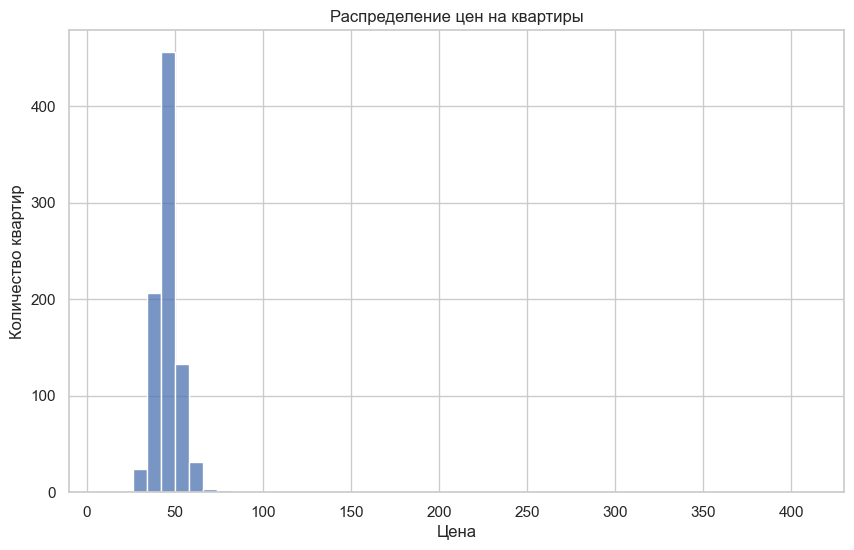

In [550]:
# Построение гистограммы с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['метраж'], bins=50, binrange=(10, 410), kde=False)

# Добавление заголовка и меток осей
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

# Отображение графика
plt.show()

Мы видим, что чаще всего встречаются объявления о продаже квартир с жилой площадью примерно 45  кв метров, очень редко с жилой площадью более 60 кв метров. В основном жилая площадь в диапазоне от 30 до 55 кв метров.

Изучим параметр - цена объекта, построим гистограмму. Ограничим гистограмму значением стоимости 10 млн руб, так как далее идет сильное отклонение от средней стоимости квартир и нам для наглядности графика они будут мешать.

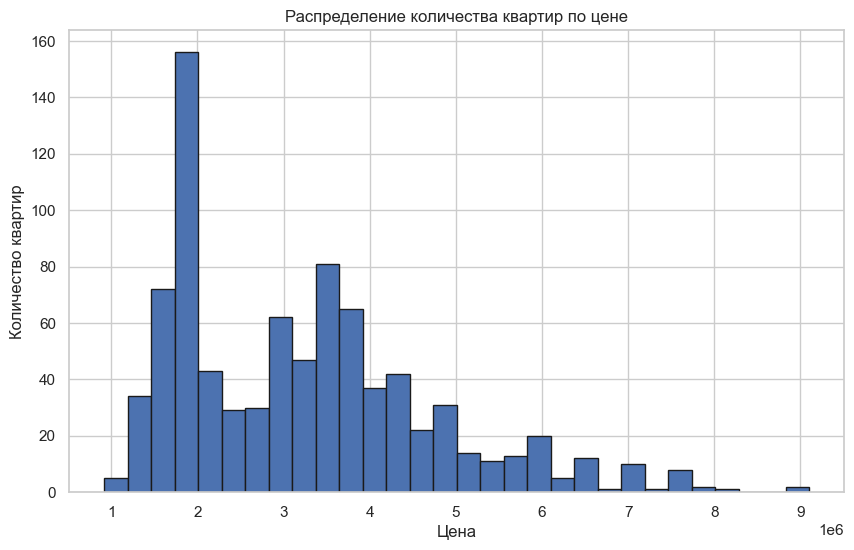

In [551]:
plt.figure(figsize=(10, 6))
plt.hist(df['цена'], bins=30, edgecolor='k')
plt.title('Распределение количества квартир по цене')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Гистограмма показывает, что больше всего предложений по стоимости примерно от 2 млн руб до 3,5 млн руб, есть какая-то аномально дешевая квартира за 950 тыс руб и редко встречается недвижимость стоимостью более 6,5 млн руб.

Изучим параметр - этаж квартиры, построим гистограмму.

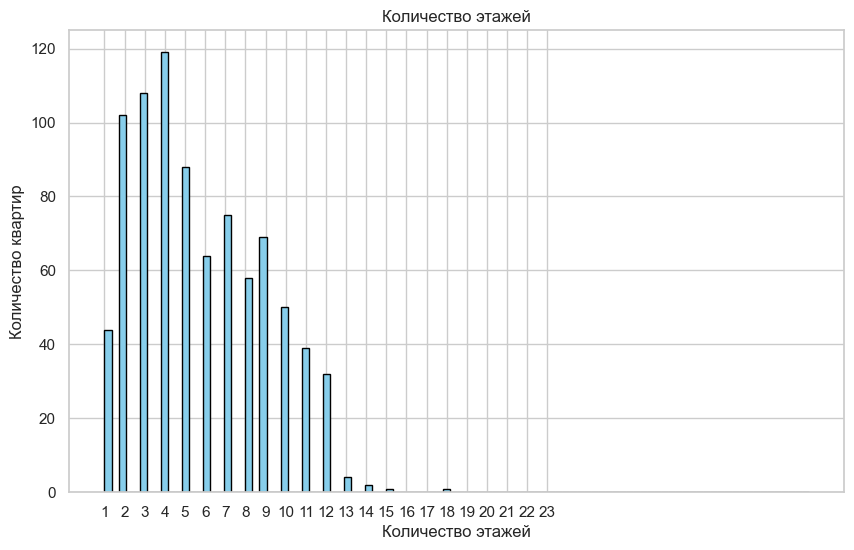

In [575]:
plt.figure(figsize=(10, 6))  # Увеличиваем размер для лучшей видимости
df['этаж'].hist(bins=100, range=(1, 36), color='skyblue', edgecolor='black')

# Настройка заголовка и меток осей
plt.title('Количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')

# Настройка оси x для отображения целых чисел от 1 до 36
plt.xticks(range(1, 24, 1))

# Показ графика
plt.show()

Больше всего квартиры в объявлениях на 4 атаже, далее идут- 3,2,5,9. Значительно меньше предложений по 14,13,15,18 этажам соответственно. Далее идут почти наравне 1 и 11 этажи,чуть высше потом 10,8 и 6. После 12 количество предложений стремится с 10 до 0.

Добавим колонку в наш датафрейм которая классифицирует этаж квартиры как «первый», «последний» или «другой»

In [553]:
min_floor = df['этаж'].min()
max_floor = df['этаж'].max()

# Создаем новую колонку с категорией этажа
df['категория_этажа'] = df['этаж'].apply(lambda x: 'первый' if x == min_floor else ('последний' if x == max_floor else 'другой'))

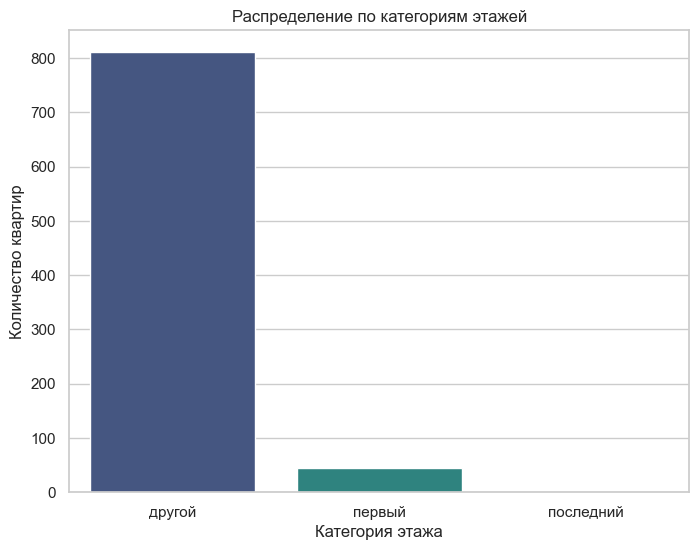

In [554]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='категория_этажа', palette='viridis')

# Добавление заголовка и меток осей
plt.title('Распределение по категориям этажей')
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')

# Показ графика
plt.show()

Больше всего объявлений ни на первом ни на последнем этаже, но все же квартир на первом этаже (примерно 50) встречается больше, чем на последнем (0). В новых домах, впринципе, реже встречаются жилые первые этажи - это факт.

Изучим параметр - общее количество этажей в доме, построим гистограмму.

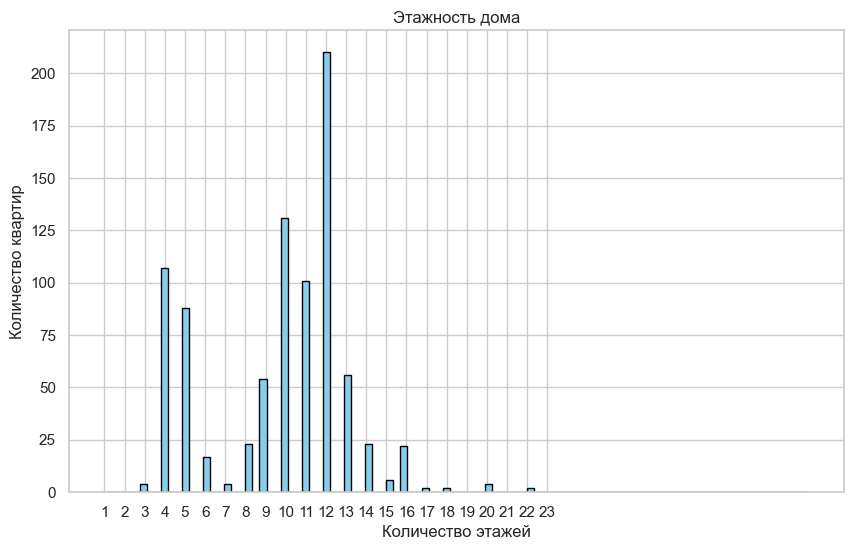

In [573]:
plt.figure(figsize=(10, 6))  # Увеличиваем размер для лучшей видимости
df['всего_этажей'].hist(bins=100, range=(1, 36), color='skyblue', edgecolor='black')

# Настройка заголовка и меток осей
plt.title('Этажность дома')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')

# Настройка оси x для отображения целых чисел от 1 до 36
plt.xticks(range(1, 24, 1))

# Показ графика
plt.show()


Самое большое количество квартир продается в 12 - ти этажных домах. Далее идути 10--ти этажки, 4-ти и 11-ти этажные дома почти наравне. Далее идут 5, 9 и 13 этажей.Одноэтажных построек нет как и 19,21 домов, это логично.

Изучим параметр - день публикации, построим гистограмму.

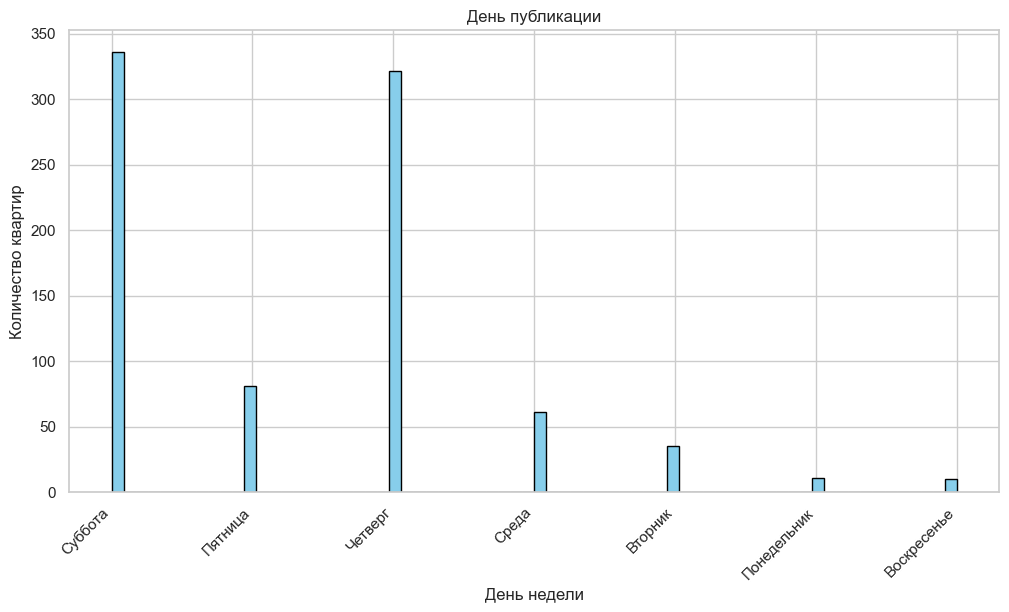

In [578]:
plt.figure(figsize=(12, 6))  # Увеличиваем размер графика

# Построение гистограммы
df['день_недели'].hist(bins=70, color='skyblue', edgecolor='black')

# Настройка заголовка и меток осей
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')

# Настройка оси x для лучшей читаемости меток
plt.xticks(rotation=45, ha='right')

# Показ графика
plt.show()

Судя по гистограмме, в субботу и четверг размещается наибольшее количество объявлений о продаже недвижимости. Затем идет пятница и среда, во вторник,понедельник и воскресенье количество размещений падает примерно в разы.

Изучим параметр - месяц публикации, построим гистограмму

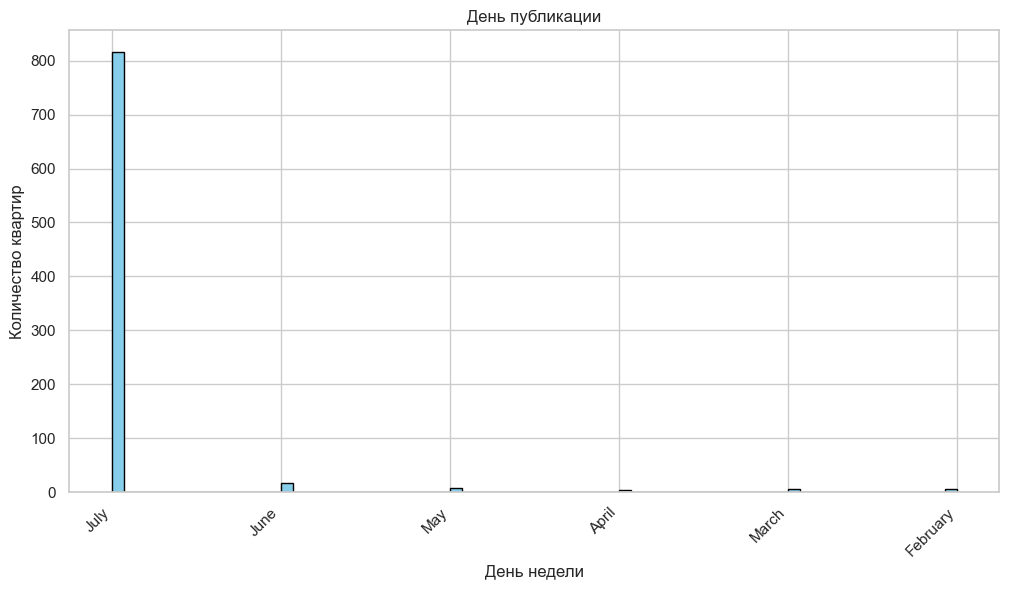

In [581]:
plt.figure(figsize=(12, 6))  # Увеличиваем размер графика

# Построение гистограммы
df['месяц'].hist(bins=70, color='skyblue', edgecolor='black')

# Настройка заголовка и меток осей
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')

# Настройка оси x для лучшей читаемости меток
plt.xticks(rotation=45, ha='right')

# Показ графика
plt.show()

Так как объявления мы парсили в летом (июле) количество квартир в этом месяце будем преобладать.

Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Для ответа на вопрос о зависимости стоимости от площадей квартиры создадим сводную таблицу и посторим график для наглядности

In [586]:
df_pivot = df.pivot_table(index='цена', values=['метраж','этаж'])
df_pivot.reset_index().head(10)

,цена,метраж,этаж
0,920000,28.0,5.0
1,1000000,35.0,5.0
2,1070003,34.0,5.0
3,1170000,32.0,2.0
4,1173001,38.0,5.0
5,1250004,35.0,5.0
6,1300000,35.0,5.0
7,1320004,35.0,5.0
8,1332004,36.0,2.0
9,1338000,44.0,7.0


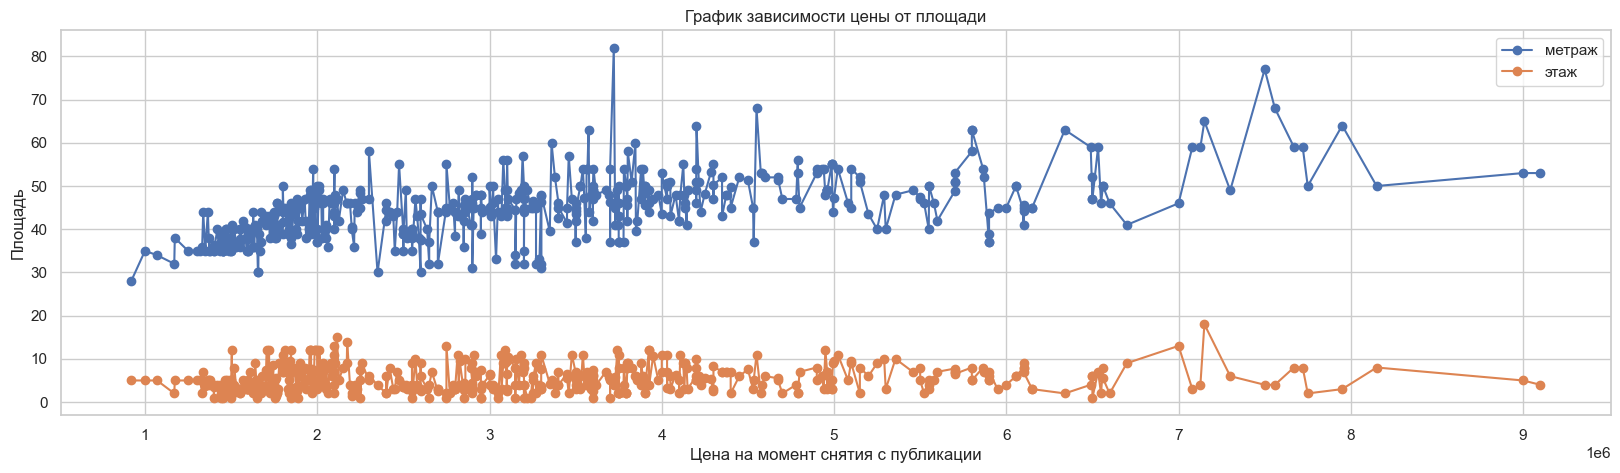

In [587]:
df_pivot.plot(style='o-',grid=True, figsize=(20,5), title='График зависимости цены от площади')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь')
plt.show()

На графике прослеживается линейная зависимость стоимости недвижимости от площади, этаж. Пожалуй, самая не явная зависимоть от этажа. Видимо все-таки при покупке квартиры в первую очередь обращают внимание только на общую площадь, этаж идет плюсом как дополнение. Рассчитанные ниже коэфициенты корреляции нам это подтверждают.

In [593]:
df['метраж'].corr(df['цена'])

0.5403867300166088

Проверим зависимость цены недвижимости от дня недели подачи объявления.

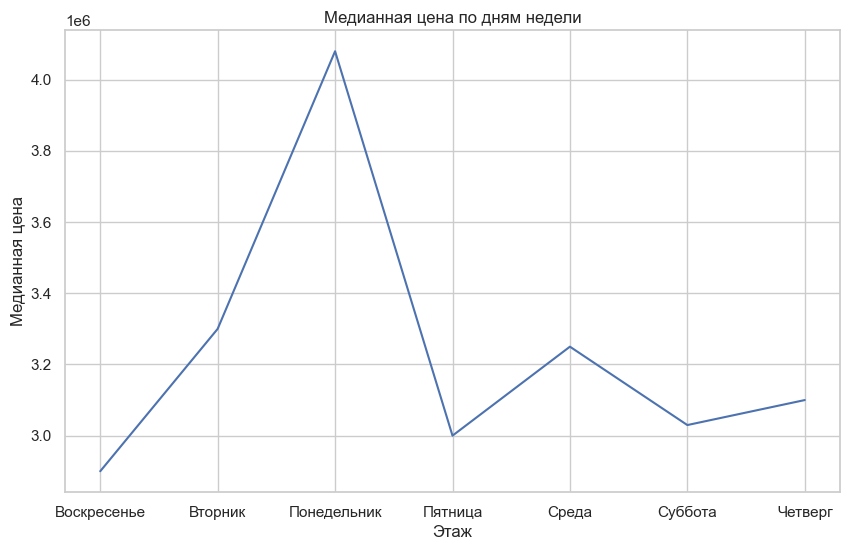

                     mean  count     median
день_недели                                
Понедельник  3.783033e+06     11  4080000.0
Вторник      3.443387e+06     35  3300002.0
Среда        3.557976e+06     61  3250000.0
Четверг      3.286984e+06    322  3100006.5
Суббота      3.164709e+06    336  3029800.0
Пятница      3.085666e+06     81  3000000.0
Воскресенье  2.892950e+06     10  2900000.0


In [599]:
df_pivot_2 = df.pivot_table(index='день_недели', values='цена', aggfunc=['mean', 'count', 'median'])
df_pivot_2.columns = ['mean', 'count', 'median']

# Построение графика медианы
plt.figure(figsize=(10, 6))
df_pivot_2['median'].plot(y='median')
plt.title('Медианная цена по дням недели')
plt.xlabel('Этаж')
plt.ylabel('Медианная цена')
plt.grid(True)
plt.show()

# Сортировка таблицы по медиане
df_pivot_2_sorted = df_pivot_2.sort_values('median', ascending=False)
print(df_pivot_2_sorted)

По понедельникам при подачи объявления цена самая большая.


Проанализируем зависимость цены на недвижимость от типа этажа, на котором расположена квартира (первый, последний, другой)

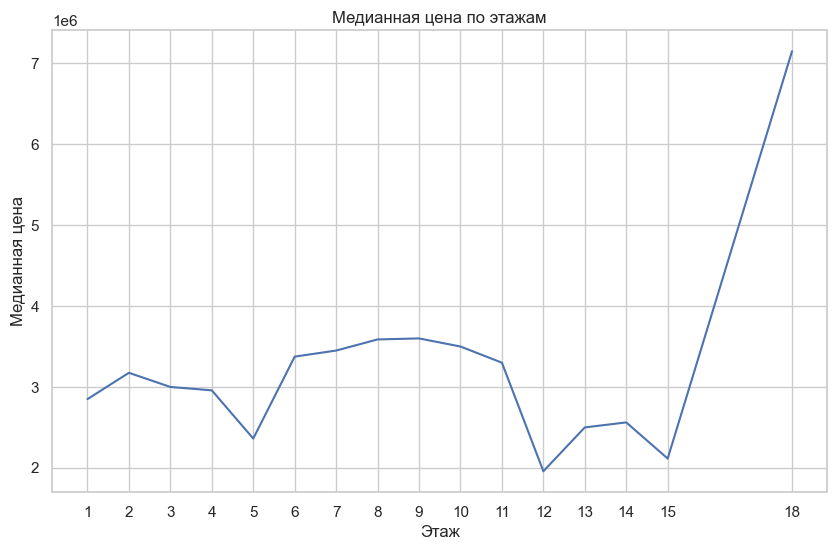

              mean  count     median
этаж                                
18    7.150004e+06      1  7150004.0
9     3.620849e+06     69  3600000.0
8     3.620550e+06     58  3587500.0
10    3.490163e+06     50  3500000.0
7     3.615242e+06     75  3450001.0
6     3.509221e+06     64  3375000.0
11    3.233738e+06     39  3300006.0
2     3.080063e+06    102  3175003.0
3     3.201833e+06    108  3000000.0
4     3.098108e+06    119  2958121.0
1     2.765031e+06     44  2850000.5
14    2.561875e+06      2  2561875.0
13    3.525001e+06      4  2500001.0
5     3.073733e+06     88  2362500.0
15    2.115001e+06      1  2115001.0
12    2.322579e+06     32  1958000.0


In [601]:
df_pivot_2 = df.pivot_table(index='этаж', values='цена', aggfunc=['mean', 'count', 'median'])
df_pivot_2.columns = ['mean', 'count', 'median']

# Преобразование индекса в целые числа
df_pivot_2.index = df_pivot_2.index.astype(int)

# Построение графика медианы
plt.figure(figsize=(10, 6))
df_pivot_2['median'].plot(y='median')
plt.title('Медианная цена по этажам')
plt.xlabel('Этаж')
plt.ylabel('Медианная цена')
plt.grid(True)

# Настройка оси x для отображения целых чисел
plt.xticks(df_pivot_2.index)

plt.show()

# Сортировка таблицы по медиане
df_pivot_2_sorted = df_pivot_2.sort_values('median', ascending=False)
print(df_pivot_2_sorted)

Самые низкие цены мы наблюдаем на квартиры на 12 этаже, цены на последнем этаже значительно выше, чем цены не на других этажей. Результаты логичны, общепринято, что для проживания лучшими вариантами раньше были не первый и не последний этаж, но в современных постройках, мне кажется, уже не всегда так, первый этаж часто коммерческий, а последний может быть интересен планировкой.

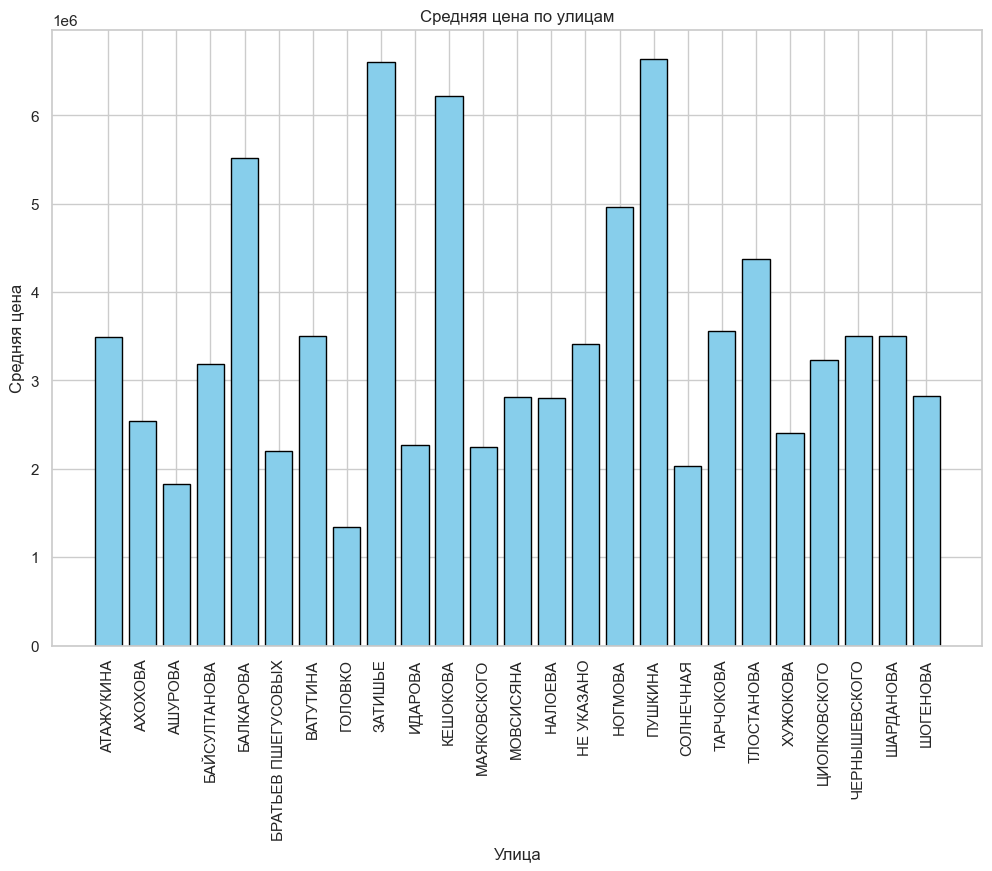

In [611]:
df['улица'] = df['улица'].str.upper()

# Группировка по 'улица' и расчет средней цены
df_grouped = df.groupby('улица')['цена'].mean().reset_index()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 8))
plt.bar(df_grouped['улица'], df_grouped['цена'], color='skyblue', edgecolor='black')

# Настройка заголовка и меток осей
plt.title('Средняя цена по улицам')
plt.xlabel('Улица')
plt.ylabel('Средняя цена')
plt.xticks(rotation=90)  # Поворот меток на оси x для лучшей читабельности
plt.grid(True)

# Показ графика
plt.show()

Мы получили график зависимости цены недвижимости от улиц. Можно сказать, что в самом центре и близко к центру стоимость кв метра самая высокая, далее идет постепенное снижение с редкими скачками и примерно на расстоянии 9 км от центра снижение происходит плавнее.

# Исследовательский Анализ Рынка Недвижимости в Нальчике

## Общий Вывод

На основе спарсенных данных о 1-комнатных квартирах в городе Нальчик мы провели исследовательский анализ с целью выявить интересные особенности и зависимости на рынке недвижимости. На первом этапе мы выполнили предобработку данных: избавились от пропусков, оставили без изменений столбцы с характеристиками места положения объектов, поработали с аномальными значениями и удалили некоторые выбросы. В результате предобработки мы сохранили более 99% данных.

Далее мы посчитали и пополнили данные, включив цену квадратного метра, день, месяц и год публикации, тип этажа квартиры и улицу. Мы изучили эти параметры, а также картографическое положение объектов, площадь и количество комнат.

## Результаты Исследования

### 1. Жилая Площадь
- **Наиболее частый размер**: Чаще всего встречаются объявления о продаже квартир с жилой площадью около 45 кв.м.
- **Редкие размеры**: Очень редко встречаются квартиры с жилой площадью более 60 кв.м.
- **Основной диапазон**: Основная жилая площадь находится в диапазоне от 30 до 55 кв.м.

### 2. Стоимость Квартир
- **Популярный ценовой диапазон**: Больше всего предложений по стоимости от 2 млн руб до 3,5 млн руб.
- **Аномально низкие и высокие цены**: Есть аномально дешевая квартира за 950 тыс руб, и редко встречаются квартиры стоимостью более 6,5 млн руб.

### 3. Этажность Квартир
- **Популярные этажи**: Больше всего квартир в объявлениях расположены на 4 этаже, за ним следуют 3, 2, 5 и 9 этажи.
- **Малопопулярные этажи**: Значительно меньше предложений на 14, 13, 15 и 18 этажах. Почти наравне идут 1 и 11 этажи, чуть выше — 10, 8 и 6 этажи.
- **Редкие этажи**: После 12 этажа количество предложений стремительно снижается до 0.

### 4. Первые и Последние Этажи
- **Первый и последний этаж**: Больше всего объявлений приходится ни на первый, ни на последний этаж, однако квартир на первом этаже (примерно 50) больше, чем на последнем (0).
- **Новостройки**: В новых домах редко встречаются жилые первые этажи.

### 5. Высотность Домов
- **Популярные этажи зданий**: Самое большое количество квартир продается в 12-этажных домах. Далее идут 10-этажные дома, 4- и 11-этажные дома почти наравне.
- **Редкие этажи зданий**: Далее идут 5, 9 и 13 этажи. Одноэтажных построек нет, как и 19- и 21-этажных домов.

### 6. День Недели Размещения Объявлений
- **Популярные дни**: Наибольшее количество объявлений о продаже недвижимости размещается в субботу и четверг. Далее следуют пятница и среда.
- **Менее популярные дни**: Во вторник, понедельник и воскресенье количество размещений падает примерно в разы.

### 7. Месяц Размещения Объявлений
- **Летний пик**: Так как объявления были собраны летом (в июле), количество квартир в этом месяце преобладает.

### 8. Влияние Площади и Этажности на Стоимость
- **Линейная зависимость**: График показывает линейную зависимость стоимости недвижимости от площади.
- **Этажность**: Наименьшая зависимость наблюдается от этажа, что подтверждается расчетными коэффициентами корреляции.

### 9. Влияние Дня Недели на Стоимость
- **Дни с наибольшей стоимостью**: По понедельникам наблюдаются самые высокие цены.
- **Этажи с наименьшей стоимостью**: Самые низкие цены наблюдаются на квартиры на 12 этаже, в то время как цены на последнем этаже значительно выше, чем на других этажах.

### 10. График Зависимости Цены от Улицы
- **Центр города**: Самая высокая стоимость квадратного метра в самом центре и близко к центру.
- **Отдаление от центра**: С удалением от центра стоимость постепенно снижается с редкими скачками, а примерно на расстоянии 9 км снижение происходит плавнее.

Эти выводы позволяют лучше понимать распределение цен и характеристик квартир на рынке недвижимости, что может быть полезным для покупателей, продавцов и аналитиков рынка.





